# Dataset for mosquito collections on Big Pine Key, Florida, USA

In [1]:
import pandas as pd
import numpy as np
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
florida = pd.read_csv('https://raw.githubusercontent.com/Zhengnan817/capstone/main/Dataset/florida_1998_to_2019.csv')
temperature = pd.read_csv('https://raw.githubusercontent.com/Juanfra21/mosquito-population-model/main/data/weather_data.csv')

In [3]:
temperature = temperature[['datetime', 'humidity', 'temp', 'precip']]

# Temperature

In [4]:

# Now create the DATE column without spaces in the names
temperature['datetime'] = pd.to_datetime(temperature['datetime'], errors='coerce')
temperature.rename(columns={'datetime': 'Date'}, inplace=True)
temperature

,Date,humidity,temp,precip
0,1998-01-01,64.1,16.5,0.000
1,1998-01-02,72.3,19.8,0.000
2,1998-01-03,82.9,21.6,0.000
3,1998-01-04,89.2,22.7,0.300
4,1998-01-05,90.5,23.4,0.000
...,...,...,...,...
8030,2019-12-27,78.5,25.2,0.451
8031,2019-12-28,81.5,25.6,0.000
8032,2019-12-29,82.3,25.8,1.442
8033,2019-12-30,85.3,25.3,3.144


# Mosquito abundance

In [5]:
florida

,YEAR,DOY,TAEN,DEIN,NIGR,ATRO,QUIN,CRUC,BAHA,INFI,...,ALBI,COND,MULR,PILO,DECL,INOR,GRAB,TITI,UNID,TOTAL
0,1998,232,"1,272.00",76,4,0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,354.00"
1,1998,237,"4,792.00",48,24,0,NaN,0,0,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,008.00"
2,1998,244,"4,000.00",0,0,0,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,000.00"
3,1998,251,488,0,0,1,NaN,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,490
4,1998,253,"1,324.00",4,0,8,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,336.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,2019,56,404,12,0,1,0.0,0,1,0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,435
994,2019,64,21,1,0,1,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23
995,2019,70,32,2,0,2,0.0,0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39
996,2019,77,206,4,0,16,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,227


In [6]:
florida['TOTAL'] = florida['TOTAL'].str.replace(',', '').astype(float)

# 显示结果验证转换是否正确
print(florida[['YEAR', 'DOY', 'TOTAL']])

     YEAR  DOY   TOTAL
0    1998  232  1354.0
1    1998  237  5008.0
2    1998  244  4000.0
3    1998  251   490.0
4    1998  253  1336.0
..    ...  ...     ...
993  2019   56   435.0
994  2019   64    23.0
995  2019   70    39.0
996  2019   77   227.0
997  2019   85     2.0

[998 rows x 3 columns]


In [7]:
# 定义一个函数将年和天转换为日期
def convert_to_date(row):
    return datetime.datetime(row['YEAR'], 1, 1) + datetime.timedelta(days=row['DOY'] - 1)

# 应用函数转换YEAR和DOY为日期
florida['Date'] = florida.apply(convert_to_date, axis=1)

# 查看转换后的结果
print(florida[['YEAR', 'DOY', 'Date']])

     YEAR  DOY       Date
0    1998  232 1998-08-20
1    1998  237 1998-08-25
2    1998  244 1998-09-01
3    1998  251 1998-09-08
4    1998  253 1998-09-10
..    ...  ...        ...
993  2019   56 2019-02-25
994  2019   64 2019-03-05
995  2019   70 2019-03-11
996  2019   77 2019-03-18
997  2019   85 2019-03-26

[998 rows x 3 columns]


In [8]:
# 选择需要的列
df_selected = florida[['Date', 'TOTAL']]

# 选择合并后的列和TOTAL列
florida = df_selected[['Date', 'TOTAL']]

florida

,Date,TOTAL
0,1998-08-20,1354.0
1,1998-08-25,5008.0
2,1998-09-01,4000.0
3,1998-09-08,490.0
4,1998-09-10,1336.0
...,...,...
993,2019-02-25,435.0
994,2019-03-05,23.0
995,2019-03-11,39.0
996,2019-03-18,227.0


# Merge the data

In [9]:
df = pd.merge(florida, temperature, on='Date', how='inner')


In [10]:
df

,Date,TOTAL,humidity,temp,precip
0,1998-08-20,1354.0,73.1,29.5,0.000
1,1998-08-25,5008.0,70.4,29.9,0.000
2,1998-09-01,4000.0,73.0,29.7,0.000
3,1998-09-08,490.0,73.4,29.8,0.300
4,1998-09-10,1336.0,78.1,29.4,2.554
...,...,...,...,...,...
993,2019-02-25,435.0,75.3,26.3,0.000
994,2019-03-05,23.0,74.8,25.6,0.000
995,2019-03-11,39.0,71.3,26.8,0.000
996,2019-03-18,227.0,73.2,25.4,0.000


In [11]:
df.rename(columns={'TOTAL': 'abundance', 'meanTemp': 'temp'}, inplace=True)

# 查看更新后的DataFrame
df

,Date,abundance,humidity,temp,precip
0,1998-08-20,1354.0,73.1,29.5,0.000
1,1998-08-25,5008.0,70.4,29.9,0.000
2,1998-09-01,4000.0,73.0,29.7,0.000
3,1998-09-08,490.0,73.4,29.8,0.300
4,1998-09-10,1336.0,78.1,29.4,2.554
...,...,...,...,...,...
993,2019-02-25,435.0,75.3,26.3,0.000
994,2019-03-05,23.0,74.8,25.6,0.000
995,2019-03-11,39.0,71.3,26.8,0.000
996,2019-03-18,227.0,73.2,25.4,0.000


# Plot the data

In [12]:
def plot_total_vs_date(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['abundance'], marker='o', color='b', linestyle='-')
    plt.title('Abundance vs. Date')
    plt.xlabel('Date')
    plt.ylabel('Abundance')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

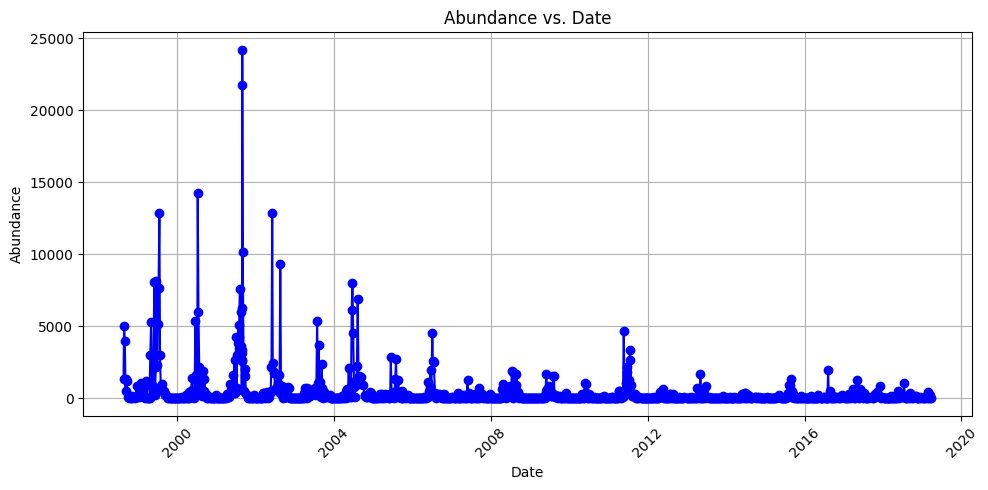

In [13]:
plot_total_vs_date(df)

# Analysis the data

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Correlation Matrix:
           abundance  humidity      temp    precip
abundance   1.000000  0.014410  0.236537 -0.015222
humidity    0.014410  1.000000  0.135482  0.284626
temp        0.236537  0.135482  1.000000  0.080469
precip     -0.015222  0.284626  0.080469  1.000000


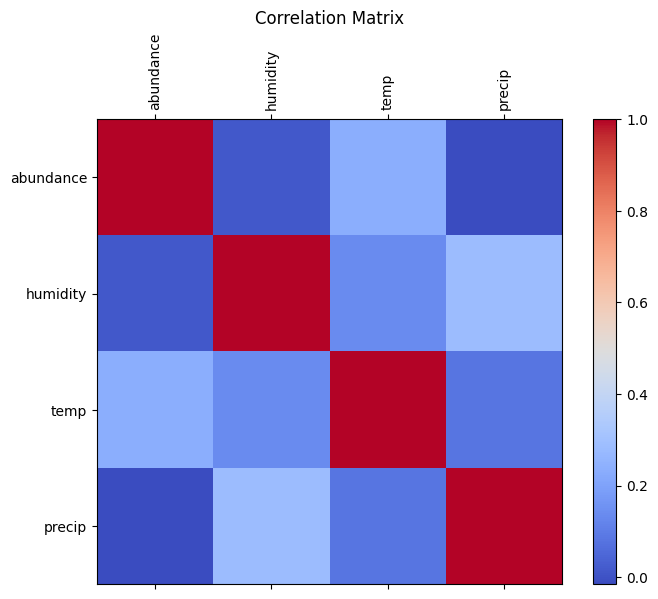

In [15]:
correlation_matrix = df[['abundance', 'humidity', 'temp', 'precip']].corr()
print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

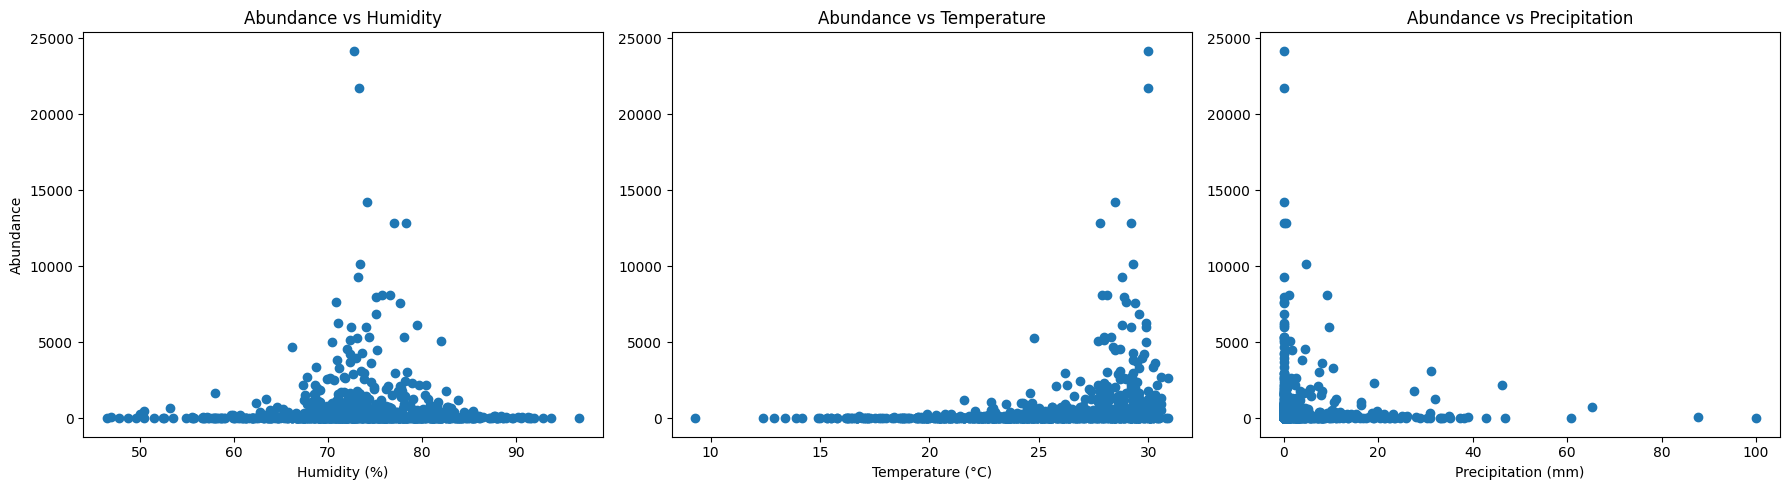

In [16]:

# Scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(df['humidity'], df['abundance'])
axes[0].set_title('Abundance vs Humidity')
axes[0].set_xlabel('Humidity (%)')
axes[0].set_ylabel('Abundance')

axes[1].scatter(df['temp'], df['abundance'])
axes[1].set_title('Abundance vs Temperature')
axes[1].set_xlabel('Temperature (°C)')

axes[2].scatter(df['precip'], df['abundance'])
axes[2].set_title('Abundance vs Precipitation')
axes[2].set_xlabel('Precipitation (mm)')

plt.tight_layout()
plt.show()

# Import the data

In [17]:
# df.to_csv('florida.csv', index=False)  # index=False意味着不将行索引写入文件

        Date  abundance  humidity  temp  precip
0 1998-08-20     1354.0      73.1  29.5   0.000
1 1998-08-25     5008.0      70.4  29.9   0.000
2 1998-09-01     4000.0      73.0  29.7   0.000
3 1998-09-08      490.0      73.4  29.8   0.300
4 1998-09-10     1336.0      78.1  29.4   2.554
                                Date     abundance    humidity        temp  \
count                            998    998.000000  998.000000  998.000000   
mean   2008-10-13 20:40:52.905811712    498.892786   73.553908   25.615130   
min              1998-08-20 00:00:00      0.000000   46.500000    9.300000   
25%              2003-07-15 18:00:00     11.250000   69.800000   23.600000   
50%              2008-10-23 12:00:00     58.000000   73.500000   26.100000   
75%              2013-11-10 00:00:00    287.500000   78.100000   28.600000   
max              2019-03-26 00:00:00  24192.000000   96.700000   30.900000   
std                              NaN   1641.873664    7.152550    3.625207   

         

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


740/740 - 1s - 1ms/step - loss: 0.0082
Epoch 2/100
740/740 - 1s - 765us/step - loss: 0.0066
Epoch 3/100
740/740 - 1s - 705us/step - loss: 0.0062
Epoch 4/100
740/740 - 1s - 707us/step - loss: 0.0060
Epoch 5/100
740/740 - 1s - 714us/step - loss: 0.0060
Epoch 6/100
740/740 - 1s - 726us/step - loss: 0.0060
Epoch 7/100
740/740 - 1s - 857us/step - loss: 0.0058
Epoch 8/100
740/740 - 1s - 705us/step - loss: 0.0058
Epoch 9/100
740/740 - 1s - 712us/step - loss: 0.0057
Epoch 10/100
740/740 - 1s - 717us/step - loss: 0.0058
Epoch 11/100
740/740 - 1s - 722us/step - loss: 0.0058
Epoch 12/100
740/740 - 1s - 711us/step - loss: 0.0058
Epoch 13/100
740/740 - 1s - 714us/step - loss: 0.0058
Epoch 14/100
740/740 - 1s - 714us/step - loss: 0.0058
Epoch 15/100
740/740 - 1s - 709us/step - loss: 0.0057
Epoch 16/100
740/740 - 1s - 705us/step - loss: 0.0058
Epoch 17/100
740/740 - 1s - 707us/step - loss: 0.0057
Epoch 18/100
740/740 - 1s - 837us/step - loss: 0.0057
Epoch 19/100
740/740 - 1s - 705us/step - loss: 0.00

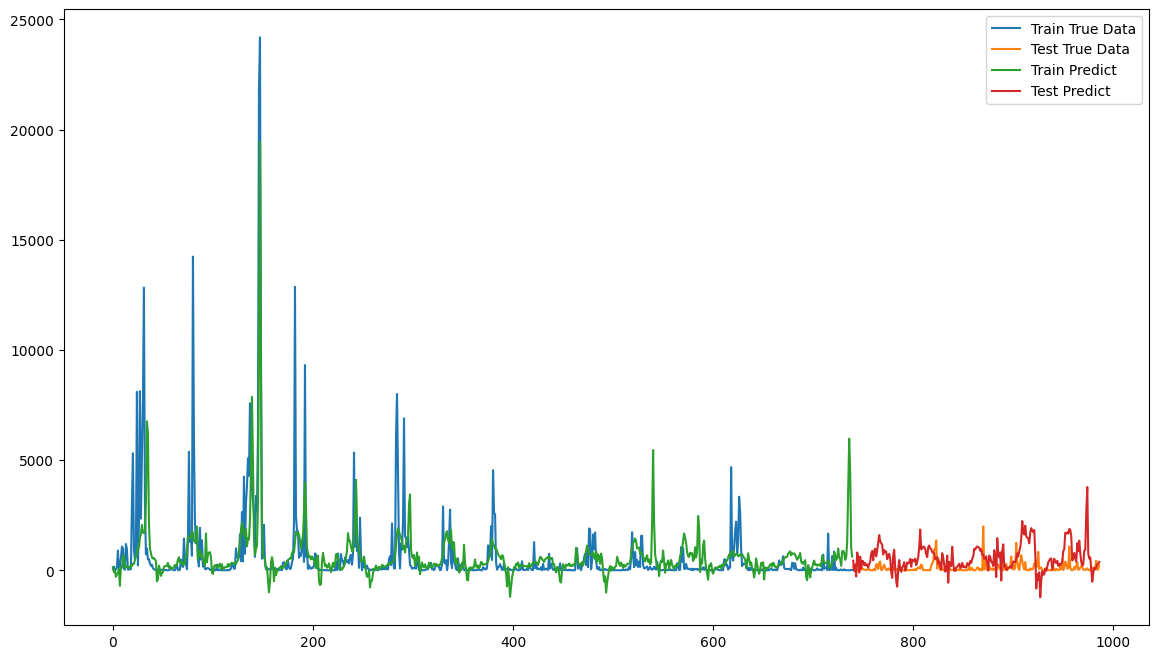

Train Mean Squared Error:  1996513.3584844556
Train Mean Absolute Error:  652.9272298086333
Train Root Mean Squared Error:  1412.9803107207317
Test Mean Squared Error:  587123.3707571214
Test Mean Absolute Error:  576.537119177189
Test Root Mean Squared Error:  766.2397606213876


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 假设 df 是包含你的数据的 DataFrame
# df 应包含 'humidity', 'temp', 'precip' 和 'abundance' 列

# 加载数据
# df = pd.read_csv('your_data.csv')  # 如果数据在CSV文件中，请取消注释并修改路径

# 检查数据
print(df.head())
print(df.describe())
print(df.isna().sum())

# 数据标准化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['humidity', 'temp', 'precip', 'abundance']])

# 创建数据窗口
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0:3]  # 使用 humidity, temp, precip 作为特征
        X.append(a)
        Y.append(dataset[i + look_back, 3])  # 使用 abundance 作为目标变量
    return np.array(X), np.array(Y)

look_back = 10  # 选择合适的窗口大小
X, Y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 3))  # LSTM 需要输入形状为 [samples, time steps, features]

# 分割数据集为训练集和测试集
train_size = int(len(X) * 0.75)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

# 构建 LSTM 模型
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 3)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# 训练模型
model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# 进行预测
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 反归一化预测结果
train_predict = scaler.inverse_transform(np.concatenate((np.zeros((train_predict.shape[0], 3)), train_predict), axis=1))[:, 3]
test_predict = scaler.inverse_transform(np.concatenate((np.zeros((test_predict.shape[0], 3)), test_predict), axis=1))[:, 3]
Y_train = scaler.inverse_transform(np.concatenate((np.zeros((Y_train.shape[0], 3)), Y_train.reshape(-1, 1)), axis=1))[:, 3]
Y_test = scaler.inverse_transform(np.concatenate((np.zeros((Y_test.shape[0], 3)), Y_test.reshape(-1, 1)), axis=1))[:, 3]

# 绘制预测结果
plt.figure(figsize=(14, 8))
plt.plot(df.index[:len(Y_train)], Y_train, label='Train True Data')
plt.plot(df.index[len(Y_train):len(Y_train) + len(Y_test)], Y_test, label='Test True Data')
plt.plot(df.index[:len(train_predict)], train_predict, label='Train Predict')
plt.plot(df.index[len(train_predict):len(train_predict) + len(test_predict)], test_predict, label='Test Predict')
plt.legend()
plt.show()

# 计算预测误差
mse_train = mean_squared_error(Y_train, train_predict)
mae_train = mean_absolute_error(Y_train, train_predict)
rmse_train = np.sqrt(mse_train)

mse_test = mean_squared_error(Y_test, test_predict)
mae_test = mean_absolute_error(Y_test, test_predict)
rmse_test = np.sqrt(mse_test)

print("Train Mean Squared Error: ", mse_train)
print("Train Mean Absolute Error: ", mae_train)
print("Train Root Mean Squared Error: ", rmse_train)
print("Test Mean Squared Error: ", mse_test)
print("Test Mean Absolute Error: ", mae_test)
print("Test Root Mean Squared Error: ", rmse_test)


In [19]:
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

In [20]:

# 计算测试集的残差
residuals_test = Y_test - test_predict

# 输出残差
print("Test residuals:", residuals_test)

Test residuals: [-2.62410925e+02 -9.32590499e+01 -2.40657698e+02 -1.06078677e+01
 -5.86190920e+02 -5.86673366e+02  9.65391169e+01 -3.51363495e+02
 -1.11022797e+02 -2.46438717e+02 -3.81555195e+02 -2.18555014e+02
 -2.83589986e+02 -2.71317251e+02 -2.61433862e+02 -1.50642135e+02
 -2.67530883e+02 -4.54833341e+02 -6.91029448e+02 -8.06113783e+02
 -2.90152192e+02 -5.27806048e+02 -7.10959166e+02 -2.11469962e+02
 -5.28924459e+02 -1.45052292e+03 -1.59449217e+03 -1.19753142e+03
 -1.35976943e+03 -1.05439436e+03 -7.28018915e+02 -4.02752891e+02
 -7.33834641e+02 -7.69095223e+02 -3.15784424e+02 -1.10656919e+02
  2.50969753e+01  2.07156077e+02  8.59703936e+02  2.91729505e+02
  1.25981606e+02 -5.53190158e+02  2.48441473e+02  1.19543022e+03
  1.26262371e+03  4.04237283e+02 -2.00654685e+01  1.04489868e+02
  3.46426671e+01 -1.11421081e+02 -2.19192431e+02 -3.18881173e+02
 -1.01187744e+02 -1.99978753e+02 -5.80045316e+01 -3.35001970e+02
 -2.75209743e+02 -3.46551177e+02 -1.50833426e+02 -2.04676888e+02
 -2.26266

In [22]:
residuals_test

array([-2.62410925e+02, -9.32590499e+01, -2.40657698e+02, -1.06078677e+01,
       -5.86190920e+02, -5.86673366e+02,  9.65391169e+01, -3.51363495e+02,
       -1.11022797e+02, -2.46438717e+02, -3.81555195e+02, -2.18555014e+02,
       -2.83589986e+02, -2.71317251e+02, -2.61433862e+02, -1.50642135e+02,
       -2.67530883e+02, -4.54833341e+02, -6.91029448e+02, -8.06113783e+02,
       -2.90152192e+02, -5.27806048e+02, -7.10959166e+02, -2.11469962e+02,
       -5.28924459e+02, -1.45052292e+03, -1.59449217e+03, -1.19753142e+03,
       -1.35976943e+03, -1.05439436e+03, -7.28018915e+02, -4.02752891e+02,
       -7.33834641e+02, -7.69095223e+02, -3.15784424e+02, -1.10656919e+02,
        2.50969753e+01,  2.07156077e+02,  8.59703936e+02,  2.91729505e+02,
        1.25981606e+02, -5.53190158e+02,  2.48441473e+02,  1.19543022e+03,
        1.26262371e+03,  4.04237283e+02, -2.00654685e+01,  1.04489868e+02,
        3.46426671e+01, -1.11421081e+02, -2.19192431e+02, -3.18881173e+02,
       -1.01187744e+02, -

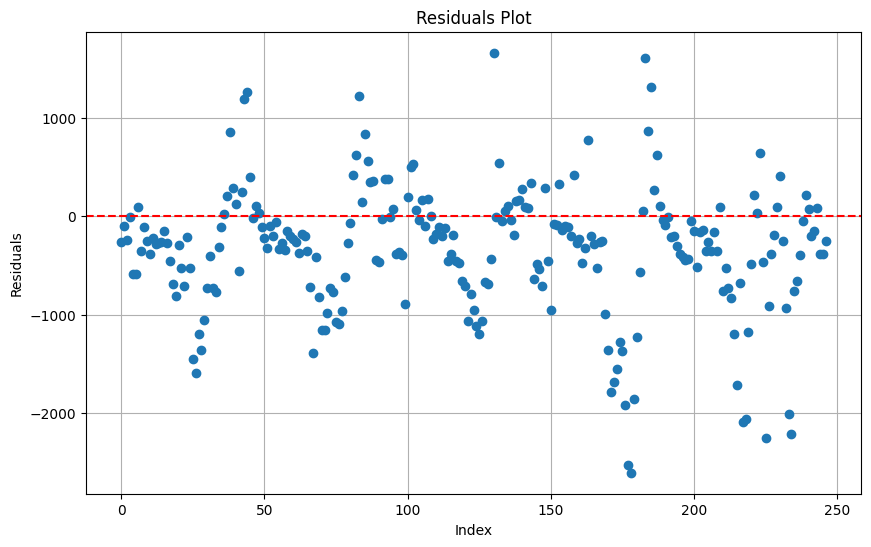

In [23]:
import matplotlib.pyplot as plt

# 假设 residuals_test 是一个 Pandas Series 或 Numpy 数组，包含模型的预测残差
plt.figure(figsize=(10, 6))  # 设置图形的尺寸
plt.plot(residuals_test, marker='o', linestyle='')  # 使用圆圈标记每个点，不连接线条
plt.title('Residuals Plot')  # 设置图形标题
plt.xlabel('Index')  # 设置x轴标签
plt.ylabel('Residuals')  # 设置y轴标签
plt.axhline(y=0, color='r', linestyle='--')  # 画一条红色虚线在y=0
plt.grid(True)  # 显示网格
plt.show()


In [24]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
adf_result = adfuller(residuals_test)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -6.276043955753527
p-value: 3.898433598915137e-08


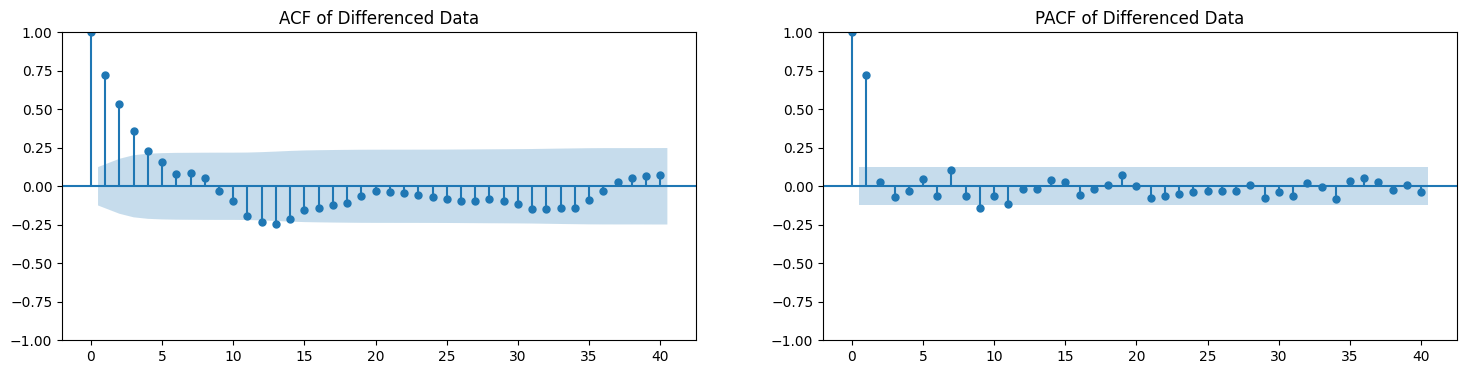

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1, 2, figsize=(18, 4))
plot_acf(residuals_test, lags=40, ax=ax[0])
ax[0].set_title('ACF of Differenced Data')
plot_pacf(residuals_test, lags=40, ax=ax[1], method='ywm')
ax[1].set_title('PACF of Differenced Data')
plt.show()

In [28]:
split_point = int(len(residuals_test) * 0.75)
train = residuals_test[:split_point]
test = residuals_test[split_point:]

# 查看结果
print("Train set size:", len(train))
print("Test set size:", len(test))

Train set size: 185
Test set size: 62


In [29]:
train

array([-2.62410925e+02, -9.32590499e+01, -2.40657698e+02, -1.06078677e+01,
       -5.86190920e+02, -5.86673366e+02,  9.65391169e+01, -3.51363495e+02,
       -1.11022797e+02, -2.46438717e+02, -3.81555195e+02, -2.18555014e+02,
       -2.83589986e+02, -2.71317251e+02, -2.61433862e+02, -1.50642135e+02,
       -2.67530883e+02, -4.54833341e+02, -6.91029448e+02, -8.06113783e+02,
       -2.90152192e+02, -5.27806048e+02, -7.10959166e+02, -2.11469962e+02,
       -5.28924459e+02, -1.45052292e+03, -1.59449217e+03, -1.19753142e+03,
       -1.35976943e+03, -1.05439436e+03, -7.28018915e+02, -4.02752891e+02,
       -7.33834641e+02, -7.69095223e+02, -3.15784424e+02, -1.10656919e+02,
        2.50969753e+01,  2.07156077e+02,  8.59703936e+02,  2.91729505e+02,
        1.25981606e+02, -5.53190158e+02,  2.48441473e+02,  1.19543022e+03,
        1.26262371e+03,  4.04237283e+02, -2.00654685e+01,  1.04489868e+02,
        3.46426671e+01, -1.11421081e+02, -2.19192431e+02, -3.18881173e+02,
       -1.01187744e+02, -

In [31]:
from pmdarima import auto_arima
model_auto = auto_arima(train, start_p=0, start_q=0, max_p=9, max_q=3,
                   test='adf', seasonal=False, trace=True, error_action='ignore',
                   suppress_warnings=True, stepwise=True)

print(model_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2961.810, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2777.145, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2857.472, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2777.268, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2777.440, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2779.181, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2774.604, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2923.690, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2775.661, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2775.784, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2833.257, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2777.480, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.315 seconds
                               SARIMAX Results                                
Dep. Vari

In [32]:
model_auto.resid

<bound method ARIMA.resid of ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)>

In [33]:
arima_model = ARIMA(residuals_test, order=(1, 0, 0))  # Note 'd' parameter is now 1
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  247
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1862.367
Date:                Tue, 06 Aug 2024   AIC                           3730.733
Time:                        09:18:19   BIC                           3741.261
Sample:                             0   HQIC                          3734.972
                                - 247                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -343.3375    103.958     -3.303      0.001    -547.092    -139.583
ar.L1          0.7192      0.036     20.054      0.000       0.649       0.789
sigma2      2.075e+05   1.18e+04     17.614      0.000    1.84e+05    2.31e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               100.51
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.60   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

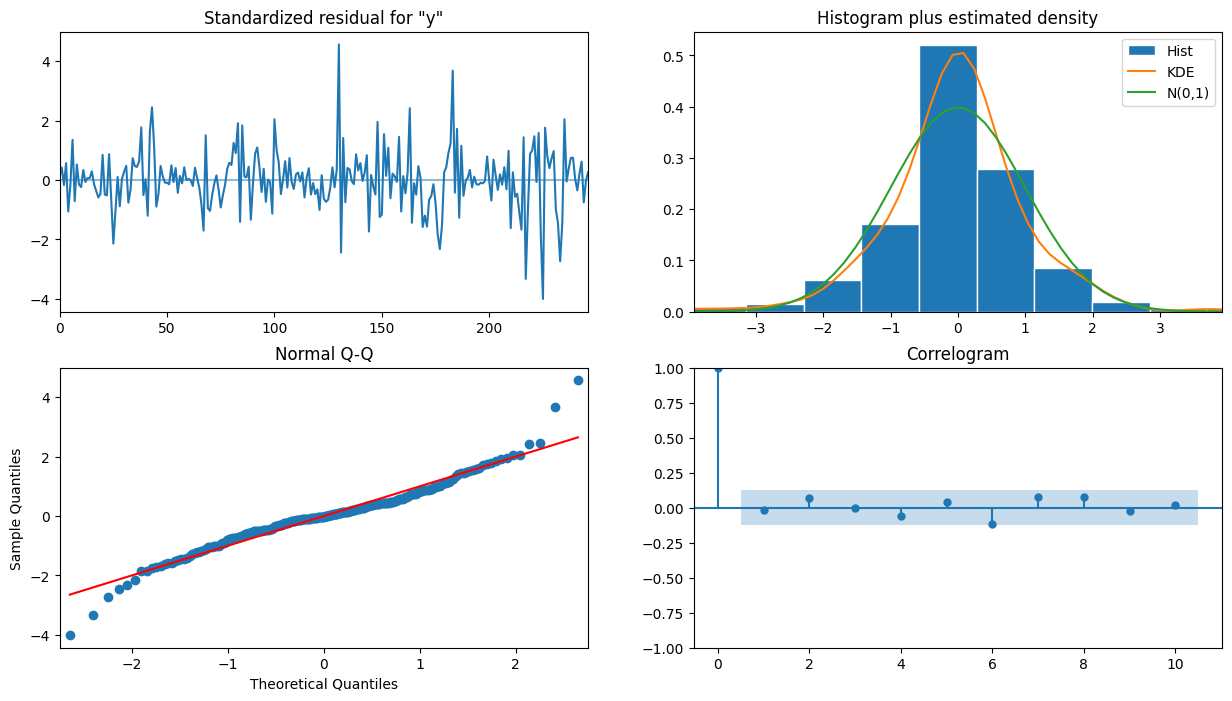

In [34]:
arima_model_fit.plot_diagnostics(figsize=(15, 8))
plt.show()

In [35]:
predictions = arima_model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
print(predictions)

[  530.4790603    848.79712509    98.5247735    352.16554604
   -17.25452483  -120.1372835   -157.16375003   -97.90269841
  -248.23076185  -237.9982907   -313.74503674  -374.02752955
  -395.69810843  -417.87296108  -405.95015605  -128.70537676
  -200.98122447  -466.96472394  -208.61769508  -198.86413198
  -347.75380511  -284.09930121  -351.4906187   -208.67052282
  -349.24917738   -26.14554034  -645.64136151  -475.57308341
  -623.47597911  -696.29952597  -955.44868989 -1330.46598447
  -582.86488352 -1604.80322987 -1579.16764698  -943.48531018
  -447.29554609    63.63349769   -72.94384994   370.14335713
  -433.33595699 -1718.8284072   -755.3679553   -373.63185899
  -233.86589493   -27.66711232   202.01889209  -276.10679107
  -769.34589973 -1544.53890771 -1687.06931787  -639.85361659
  -573.31660478  -382.05289034  -127.78800417    57.22609213
   -45.15259114  -243.42438369  -201.2125797    -38.72793686
  -370.14957176  -373.05569539]


In [40]:
final_prediction = test_predict[-62:] + predictions

In [43]:
# 计算 MSE 和 RMSE
mse = mean_squared_error(Y_test[split_point:], final_prediction)
rmse = np.sqrt(mse)

# 计算 MAE
mae = mean_absolute_error(Y_test[split_point:], final_prediction)

# 计算 R²
r2 = r2_score(Y_test[split_point:], final_prediction)

print("均方误差 (MSE):", mse)
print("均方根误差 (RMSE):", rmse)
print("平均绝对误差 (MAE):", mae)
print("R² 或决定系数:", r2)

均方误差 (MSE): 272250.21113291744
均方根误差 (RMSE): 521.7760162492307
平均绝对误差 (MAE): 371.67391811664464
R² 或决定系数: -6.447222236023056
